### Import libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score, f1_score, accuracy_score

# Importing the dtaset

In [2]:
df = pd.read_csv(r"C:\Users\india\Downloads\emotions.csv")

## Missing values

In [3]:
df.isna().sum()

text     0
label    0
dtype: int64

## Duplicate values

In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(11999, 2)

In [7]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

* 0 - Sad
* 1 - Joy
* 2 - Love
* 3 - Anger
* 4 - Fear
* 5 - Surprise

In [8]:
df['label'] = df['label'].map({0:'Sad', 1:'Joy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'})

In [9]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,Sad
1,i dont know i feel so lost,Sad
2,i was beginning to feel quite disheartened,Sad
3,i can still lose the weight without feeling de...,Sad
4,im feeling a little like a damaged tree and th...,Sad
...,...,...
11995,i feel weird using his first name but the alte...,Surprise
11996,i read them i feel pleasantly surprised that t...,Surprise
11997,i feel a strange sense of guilt about it all,Surprise
11998,i let people know how i m actually feeling and...,Surprise


<Axes: xlabel='label'>

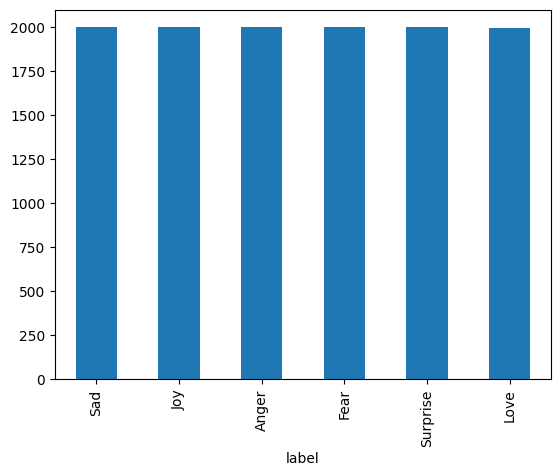

In [10]:
df['label'].value_counts().plot(kind = 'bar')

## Splitting the data

In [11]:
X = df['text']
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
X_train

9183     i have received polite comments but feel i loo...
10488    i suspect that a few feel revulsion it elicits...
6429     i guess i feel a bit less irritable now that i...
288      i like to keep it to hand and spray the very l...
2626     i own very few articles of clothing that make ...
                               ...                        
11965    i feel weird and not so happy like i am missin...
5191     i feel like he is with me just because i was s...
5390                 im feeling really sympathetic emo etc
860      i am lbs overweight and the sudden burst of tr...
7271     i feel that groups should realize that the fre...
Name: text, Length: 9599, dtype: object

In [14]:
y_test

1935          Sad
6495        Anger
1720          Sad
9121         Fear
360           Sad
           ...   
1195          Sad
11877    Surprise
5421         Love
3855          Joy
4414         Love
Name: label, Length: 2400, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
pipe = Pipeline([("Vectorization", CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=6))])

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorization', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=6))])

In [35]:
pipe.predict(X_test)

array(['Sad', 'Anger', 'Sad', ..., 'Love', 'Joy', 'Love'], dtype='<U8')

## creating a pickel

In [37]:
import pickle

In [38]:
pickle.dump(pipe, open('estimator.pkl', 'wb'))

In [40]:
import os

In [42]:
os.getcwd()

'C:\\Users\\india\\My Python Files\\Machine Learning Phase 2'

In [43]:
predict = pickle.load(open('estimator.pkl', 'rb'))

In [51]:
predict.predict(['are u mad?'])[0]

'Anger'

In [16]:
#bow = bag of words

In [17]:
bow = CountVectorizer(stop_words='english')

In [18]:
bow.fit(X_train)

CountVectorizer(stop_words='english')

In [19]:
X_trainbow = pd.DataFrame(bow.transform(X_train).todense(), columns=bow.get_feature_names_out())
X_trainbow

,aardvarkartglass,aaron,aback,abandon,abandoned,abandonment,abc,abdomen,abdominal,abhor,...,ziva,zombie,zone,zoom,zooming,zouk,zss,zurich,zz,zzzzzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_testbow = pd.DataFrame(bow.transform(X_test).todense(), columns=bow.get_feature_names_out())
X_testbow

,aardvarkartglass,aaron,aback,abandon,abandoned,abandonment,abc,abdomen,abdominal,abhor,...,ziva,zombie,zone,zoom,zooming,zouk,zss,zurich,zz,zzzzzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
mnb = MultinomialNB(alpha=5)
mnb.fit(X_trainbow, y_train)
y_predict = mnb.predict(X_testbow)
y_predict

array(['Sad', 'Anger', 'Sad', ..., 'Love', 'Joy', 'Love'], dtype='<U8')

In [23]:
accuracy_score(y_test,y_predict)

0.8583333333333333

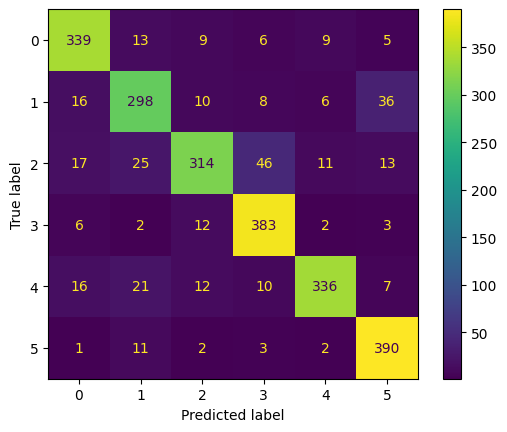

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot()

In [25]:
text = input('Enter a text : ')
mnb.predict(bow.transform([text]).toarray())[0]

Enter a text : hi how r u?


C:\Users\india\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


'Anger'